# C1 - Métodos de Raizes de Função

Essa classe de problemas pode ser encontrada em diversos problemas reais, como engenharia, economia, física, química, e até mesmo em ciências da computação. A busca por raízes de funções é essencial quando precisamos encontrar valores que satisfaçam uma determinada equação ou modelo matemático, onde o resultado dessa equação é igual a zero. Isso significa que estamos interessados em encontrar os valores de $x$ para os quais $f(x)=0$.

## Aplicações Práticas

Em engenharia, por exemplo, os métodos de raízes de função são frequentemente utilizados no cálculo de tensões em materiais, no projeto de estruturas para determinar pontos críticos e na análise de sistemas dinâmicos. Na economia, podem ser usados para encontrar o ponto de equilíbrio em modelos de oferta e demanda, ou para calcular taxas internas de retorno em análises financeiras.

Na física, as aplicações são ainda mais vastas, desde a determinação de energias de estado estacionário em mecânica quântica até a resolução de equações de movimento. Na química, o cálculo de concentrações em reações químicas em equilíbrio é um exemplo clássico de aplicação de métodos de raízes de função.

Métodos de Solução

Para resolver esses problemas, diversos métodos numéricos foram desenvolvidos, cada um com suas particularidades, vantagens e desvantagens. Entre os mais conhecidos e utilizados, podemos citar:

1. Método da Bissecção: Este é um dos métodos mais simples e robustos. Consiste em localizar a raiz dentro de um intervalo que é sucessivamente dividido ao meio. A convergência é garantida, mas pode ser lenta.

2. Método Regula Falsi (Falsa Posição): Este método é uma melhoria do método da bissecção que incorpora o conceito de interpolação linear para estimar a raiz. Ao invés de simplesmente dividir o intervalo ao meio, como na bissecção, o método Regula Falsi usa uma linha reta para conectar os pontos nas extremidades do intervalo $[a,b]$ onde os valores da função têm sinais opostos, ou seja, $f(a)f(b)<0$. A raiz é estimada no ponto onde essa linha intercepta o eixo xx, o que geralmente fornece uma aproximação mais próxima da raiz real do que a bissecção.O método começa escolhendo dois pontos iniciais onde o sinal da função muda. A cada iteração, o método recalcula a raiz estimada usando a fórmula abaixo onde $c$ é a nova estimativa da raiz. A função é então avaliada em $c$, e dependendo do sinal de $f(c)$, o intervalo é atualizado substituindo $a$ ou $b$ por $c$, mantendo o intervalo entre pontos com sinais opostos de $f(x)$.
$$c=\frac{a f(b) − b f(a)}{f(b)-f(a)}$$

3. Método de Newton-Raphson: Um método mais rápido que usa a derivada da função para estimar a raiz. É muito eficiente para funções bem comportadas, mas pode falhar ou convergir para uma raiz errada se a estimativa inicial não estiver próxima da raiz real.

4. Método da Secante: Uma alternativa ao método de Newton-Raphson que não requer o cálculo da derivada, usando duas estimativas iniciais para aproximar a raiz. Geralmente, converge mais rapidamente que o método da bissecção, mas não tão rápido quanto o método de Newton-Raphson.

In [1]:
cd(@__DIR__);
println(pwd());

using Pkg;
Pkg.activate(pwd());
Pkg.add("Plots");

using Plots;
const build_dir = "build";
const source_dir = "src";

/home/vfegger/TEM-00200/C1


  Activating project at `~/TEM-00200/C1`
   Resolving package versions...
  No Changes to `~/TEM-00200/C1/Project.toml`
  No Changes to `~/TEM-00200/C1/Manifest.toml`


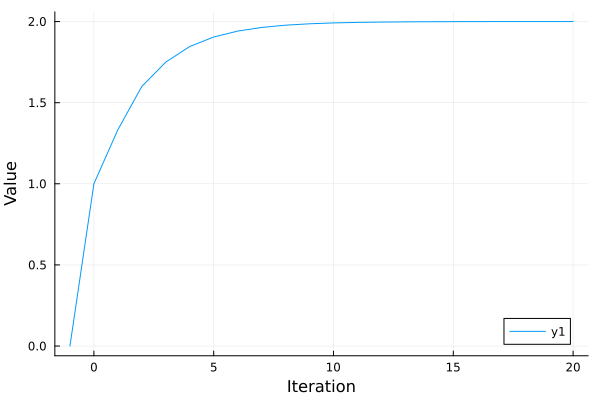

-1,0.000000
0,1.000000
1,1.333333
2,1.600000
3,1.750000
4,1.846154
5,1.904762
6,1.941176
7,1.963636
8,1.977528
9,1.986111
10,1.991416
11,1.994695
12,1.996721
13,1.997974
14,1.998748
15,1.999226
16,1.999522
17,1.999704
18,1.999817
19,1.999887
20,1.999930
Final Result: 1.999930


In [2]:
file = "secant.c"
output = "secant"
compile = `gcc $source_dir/$file -Wall -o $build_dir/$output`
execute = `./$build_dir/$output`
run(compile)
run(execute, wait=true)
values_stream = readchomp(execute);
values_strings = split.(split(values_stream,"\n")[1:end-1],",");
index, values = parse.(Int, first.(values_strings)), parse.(Float64, last.(values_strings));
plt = plot(index, values, xlabel="Iteration", ylabel="Value")
display(plt)

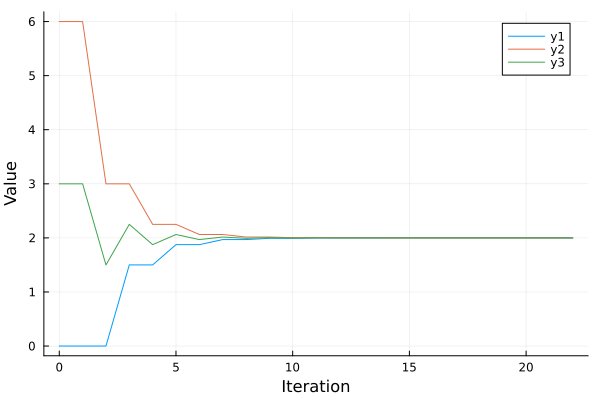

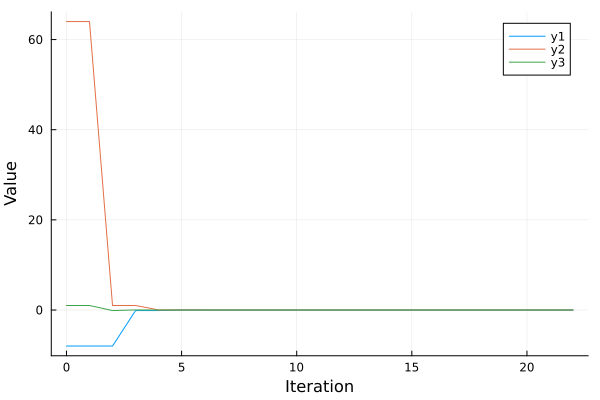

0,0.000000,6.000000,3.000000,-8.000000,64.000000,1.000000
1,0.000000,6.000000,3.000000,-8.000000,64.000000,1.000000
2,0.000000,3.000000,1.500000,-8.000000,1.000000,-0.125000
3,1.500000,3.000000,2.250000,-0.125000,1.000000,0.015625
4,1.500000,2.250000,1.875000,-0.125000,0.015625,-0.001953
5,1.875000,2.250000,2.062500,-0.001953,0.015625,0.000244
6,1.875000,2.062500,1.968750,-0.001953,0.000244,-0.000031
7,1.968750,2.062500,2.015625,-0.000031,0.000244,0.000004
8,1.968750,2.015625,1.992188,-0.000031,0.000004,-0.000000
9,1.992188,2.015625,2.003906,-0.000000,0.000004,0.000000
10,1.992188,2.003906,1.998047,-0.000000,0.000000,-0.000000
11,1.998047,2.003906,2.000977,-0.000000,0.000000,0.000000
12,1.998047,2.000977,1.999512,-0.000000,0.000000,-0.000000
13,1.999512,2.000977,2.000244,-0.000000,0.000000,0.000000
14,1.999512,2.000244,1.999878,-0.000000,0.000000,-0.000000
15,1.999878,2.000244,2.000061,-0.000000,0.000000,0.000000
16,1.999878,2.000061,1.999969,-0.000000,0.000000,-0.000000
17,1.999969,2.

In [3]:
file = "bisection.c"
output = "bisection"
compile = `gcc $source_dir/$file -Wall -o $build_dir/$output`
execute = `./$build_dir/$output`
run(compile)
run(execute, wait=true)
values_stream = readchomp(execute);
values_strings = split.(split(values_stream,"\n")[1:end-1],",");
index, values = parse.(Int, first.(values_strings)), [parse.(Float64, map(x->x[i],values_strings)) for i in 2:length(values_strings[1])];
plt = plot(index, values[1:3], xlabel="Iteration", ylabel="Value")
display(plt)
plt = plot(index, values[4:6], xlabel="Iteration", ylabel="Value")
display(plt)

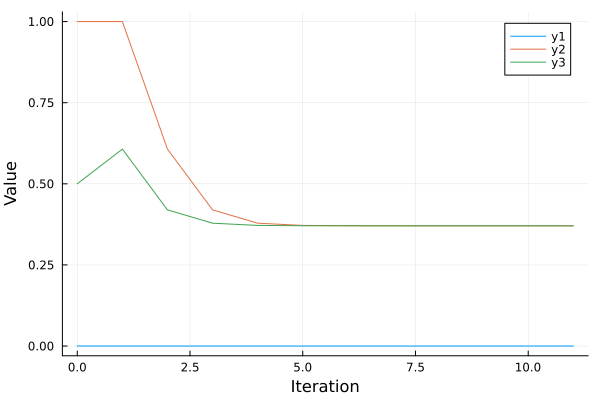

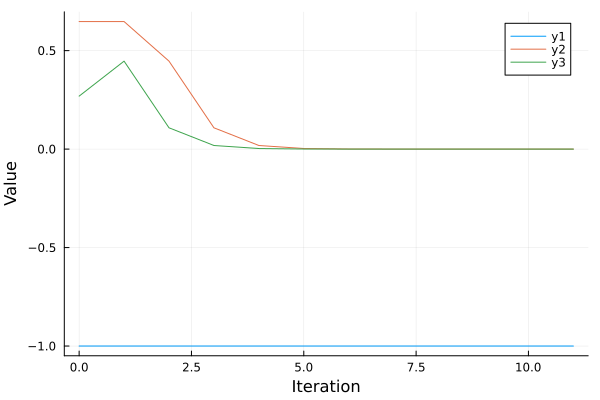

0,0.000000,1.000000,0.500000,-1.000000,0.647602,0.268981
1,0.000000,1.000000,0.606943,-1.000000,0.647602,0.446622
2,0.000000,0.606943,0.419559,-1.000000,0.446622,0.108139
3,0.000000,0.419559,0.378615,-1.000000,0.108139,0.018276
4,0.000000,0.378615,0.371820,-1.000000,0.018276,0.002875
5,0.000000,0.371820,0.370754,-1.000000,0.002875,0.000447
6,0.000000,0.370754,0.370589,-1.000000,0.000447,0.000069
7,0.000000,0.370589,0.370563,-1.000000,0.000069,0.000011
8,0.000000,0.370563,0.370559,-1.000000,0.000011,0.000002
9,0.000000,0.370559,0.370558,-1.000000,0.000002,0.000000
10,0.000000,0.370558,0.370558,-1.000000,0.000000,0.000000
11,0.000000,0.370558,0.370558,-1.000000,0.000000,0.000000
Final Result: 0.370558


In [4]:
file = "regulaFalsi.c"
output = "regulaFalsi"
compile = `gcc $source_dir/$file -Wall -o $build_dir/$output -lm`
execute = `./$build_dir/$output`
run(compile)
run(execute, wait=true)
values_stream = readchomp(execute);
values_strings = split.(split(values_stream,"\n")[1:end-1],",");
index, values = parse.(Int, first.(values_strings)), [parse.(Float64, map(x->x[i],values_strings)) for i in 2:length(values_strings[1])];
plt = plot(index, values[1:3], xlabel="Iteration", ylabel="Value")
display(plt)
plt = plot(index, values[4:6], xlabel="Iteration", ylabel="Value")
display(plt)

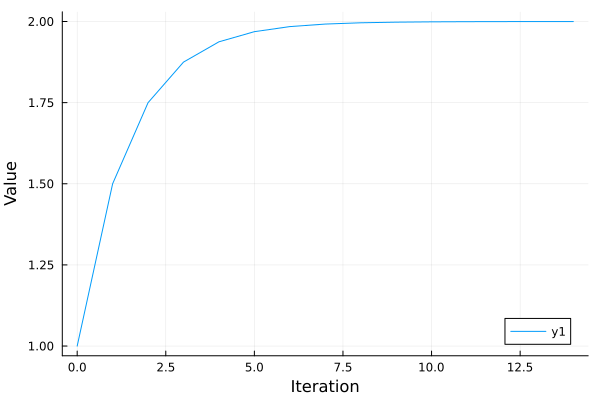

0,1.000000
1,1.500000
2,1.750000
3,1.875000
4,1.937500
5,1.968750
6,1.984375
7,1.992188
8,1.996094
9,1.998047
10,1.999023
11,1.999512
12,1.999756
13,1.999878
14,1.999939
Final Result: 1.999939


In [5]:
file = "newton.c"
output = "newton"
compile = `gcc $source_dir/$file -Wall -o $build_dir/$output`
execute = `./$build_dir/$output`
run(compile)
run(execute, wait=true)
values_stream = readchomp(execute);
values_strings = split.(split(values_stream,"\n")[1:end-1],",");
index, values = parse.(Int, first.(values_strings)), parse.(Float64, last.(values_strings));
plt = plot(index, values, xlabel="Iteration", ylabel="Value")
display(plt)